## Cryptocurrency Clusters

### Data Preparation

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file_path = Path("Data/crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#df_crypto.dtypes
df_crypto


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
df_crypto.drop(df_crypto[df_crypto['IsTrading'] == False].index, inplace=True)
df_crypto = df_crypto.drop(['IsTrading'],axis=1)
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
df_crypto['TotalCoinSupply'] = pd.to_numeric(df_crypto['TotalCoinSupply'],errors='coerce')
#df_crypto

In [6]:
df_currency = df_crypto.dropna()
#df_currency

In [7]:
df_cryptocurrency = df_currency.drop(df_currency[df_currency['TotalCoinsMined']<=0].index)
#df_cryptocurrency

In [8]:
df_cryptocurrency=df_cryptocurrency.drop(['CoinName','Unnamed: 0'],axis=1)
#df_cryptocurrency

In [9]:
df_cryptocurrency.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [10]:
df_dummies = pd.get_dummies(df_cryptocurrency)
df_dummies


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MinMaxScaler

In [11]:
>>> from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_min_max = min_max_scaler.fit_transform(df_dummies[['TotalCoinsMined','TotalCoinSupply']])
scaled_min_max

array([[0.00000000e+00, 4.20000000e-11],
       [1.06585544e-03, 5.32000000e-04],
       [2.95755135e-02, 3.14159265e-01],
       ...,
       [9.90135079e-04, 1.40022261e-03],
       [7.37028150e-06, 2.10000000e-05],
       [1.29582282e-07, 1.00000000e-06]])

In [106]:
df_scaled_minmax = pd.DataFrame(scaled_min_max)
df_scaled_minmax

,0,1
0,0.000000e+00,4.200000e-11
1,1.065855e-03,5.320000e-04
2,2.957551e-02,3.141593e-01
3,1.810842e-05,2.100000e-05
4,1.087731e-04,0.000000e+00
...,...,...
527,2.020225e-03,2.000000e-03
528,1.508199e-05,2.500000e-04
529,9.901351e-04,1.400223e-03
530,7.370282e-06,2.100000e-05


In [108]:
new_df_minmaxcrypto = pd.DataFrame(df_dummies)
new_df_minmaxcrypto['TotalCoinsMined'] =df_scaled_minmax[0]
new_df_minmaxcrypto['TotalCoinSupply'] =df_scaled_minmax[1]

crypto_final_minmax = new_df_minmaxcrypto#.dropna()
crypto_final_minmax.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0.000000,4.200000e-11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.029576,3.141593e-01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0.000064,8.400000e-05,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0.000017,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000115,2.100000e-04,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


RobustScaler

In [111]:
from sklearn.preprocessing import RobustScaler

In [112]:
transformer = RobustScaler().fit(df_dummies[['TotalCoinsMined','TotalCoinSupply']])

In [113]:
tansformed_crypto = transformer.transform(df_dummies[['TotalCoinsMined','TotalCoinSupply']])
tansformed_crypto

array([[-1.48854143e-01, -1.75365257e-01],
       [ 1.79836217e+02,  6.55689489e+02],
       [ 2.38657405e-01,  0.00000000e+00],
       ...,
       [            nan,             nan],
       [            nan,             nan],
       [            nan,             nan]])

StandardScaler()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies[['TotalCoinsMined','TotalCoinSupply']])
scaled_data

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [13]:
df_scaled = pd.DataFrame(scaled_data)
#df_scaled

In [14]:
new_df_cryptocurrency = pd.DataFrame(df_dummies)
new_df_cryptocurrency['TotalCoinsMined'] =df_scaled[0]
new_df_cryptocurrency['TotalCoinSupply'] =df_scaled[1]

crypto_final = new_df_cryptocurrency.dropna()
crypto_final.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,-0.115726,-0.151629,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-0.116731,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.114622,-0.149767,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality Reduction

### PCA Model

PCA is based on SVD or EIG, and these functions do not support NaN inputs. This is because there is no simple, unique way to ignore NaN values when computing these function.Some ideas:

If each row or column of your input matrix represents an independent measurement, remove all rows (or columns) that contain any NaN values.

Set all NaN values to zero, or to the mean (or median) of all values in the matrix. Possibly, it would be better to set them to the mean of the row or column that they are in, if these each represent one type of measurement.

Take a look at the fillmissing function, perhaps one of the options there would be suitable for replacing the NaN values in your input data.

In [15]:
# Initialize PCA model
pca = PCA(n_components=0.90)

crypto_pca = pca.fit_transform(crypto_final)
crypto_pca

array([[-0.24151077,  0.61514489,  0.80680123, -0.22857947,  0.04749688],
       [ 2.93662598,  0.6279792 ,  1.03534185, -0.40636504, -0.13798952],
       [-0.22101086,  0.93972894, -0.09684202, -0.21200764,  0.05899655],
       ...,
       [-0.25030116,  0.32949138, -0.33669873,  1.14157068,  0.32574096],
       [25.95390649,  0.11701609,  0.07737958,  0.06633505,  0.09752985],
       [-0.23273797, -0.5124082 , -0.47387553, -0.07985703, -0.10521112]])

In [16]:
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2","principal component 3", "principal component 4", "principal component 5" ]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.241511,0.615145,0.806801,-0.228579,0.047497
1,2.936626,0.627979,1.035342,-0.406365,-0.137990
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339


In [17]:
pca.explained_variance_ratio_

array([0.71230101, 0.08172273, 0.05317656, 0.03469429, 0.02515091])

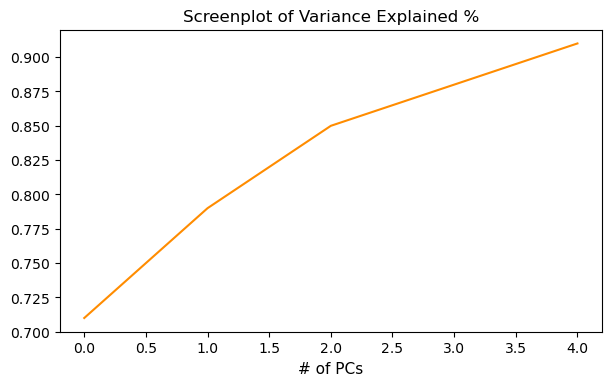

In [18]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(7,4), dpi=100)
plt.plot(variance_exp_cumsum, color='darkorange')
plt.title('Screenplot of Variance Explained %', fontsize=12)
plt.xlabel('# of PCs', fontsize=11)
plt.show()

### t-SNE 

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(learning_rate=95)

In [21]:
# reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [22]:
tsne_features.shape

(205, 2)

The dataset has 2 columns

In [23]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

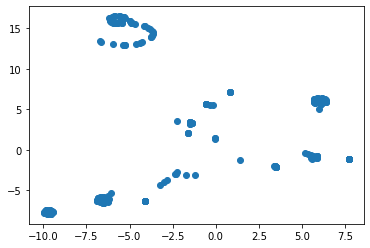

In [24]:
# the clusters visualization
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

### Cluster Analysis with k-Means

C:\Users\dasa\.conda\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


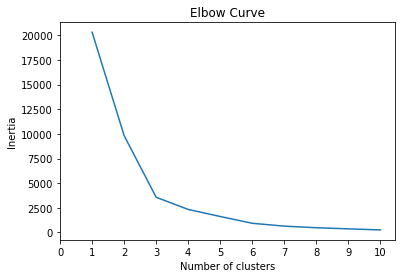

In [25]:
# creating elbow plot to identify  the best number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
df_elbow

,k,inertia
0,1,20310.978354
1,2,9820.673706
2,3,3567.101001
3,4,2332.247763
4,5,1616.602403
5,6,928.413437
6,7,640.102829
7,8,478.103340
8,9,363.390804
9,10,256.535561


In [30]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(df_crypto_pca)

KMeans(n_clusters=3, random_state=0)

In [31]:
predictions = km.predict(df_crypto_pca)
print(predictions)

[0 2 0 2 2 1 0 2 2 2 0 2 0 0 1 0 2 1 0 0 2 1 2 1 1 0 2 2 1 0 1 0 1 2 0 0 2
 2 1 1 1 1 0 0 1 2 1 1 1 0 0 1 0 2 1 1 1 0 1 2 0 1 0 0 0 1 2 1 0 0 0 0 0 1
 1 1 0 0 2 0 2 0 0 2 2 2 2 0 0 1 0 2 1 0 0 2 0 0 2 2 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 2 0 2 2 1 0 1 2 1 2 1 0 0 2 2 2 2 2 0 1 1 0 2 0 2 0 0 2 2 0 1 2 0
 0 1 0 2 0 0 0 2 2 1 2 0 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 2 0 2
 0 0 2 0 1 0 2 0 1 0 0 0 0 2 0 0 0 0 2 2]


In [32]:
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,x,y
0,-0.241511,0.615145,0.806801,-0.228579,0.047497,6.242585,6.324374
1,2.936626,0.627979,1.035342,-0.406365,-0.137990,-1.730008,-3.108006
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997,5.852531,-1.009397
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672,-9.864466,-7.460474
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339,-6.217882,-6.312476


In [33]:
# get_clusters function
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data)
    predicition = model.predict(data)
    
    data["class"] = model.labels_
    return data

In [34]:
def show_clusters(df_crypto_pca):
    plt.scatter(x=df_crypto_pca["x"], y=df_crypto_pca['y'], c=df_crypto_pca['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [36]:
clusters = get_clusters(3,df_crypto_pca)
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,x,y,class
0,-0.241511,0.615145,0.806801,-0.228579,0.047497,6.242585,6.324374,0
1,2.936626,0.627979,1.035342,-0.406365,-0.137990,-1.730008,-3.108006,2
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997,5.852531,-1.009397,0
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672,-9.864466,-7.460474,2
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339,-6.217882,-6.312476,2
...,...,...,...,...,...,...,...,...
200,-0.253363,0.396449,-0.330251,0.998168,0.302115,-1.479822,3.277441,0
201,-0.194521,0.862953,-0.074250,-0.232015,0.021616,5.563971,-0.741542,0
202,-0.250301,0.329491,-0.336699,1.141571,0.325741,-1.523364,3.438119,0
203,25.953906,0.117016,0.077380,0.066335,0.097530,-2.236682,-2.768677,2


In [39]:
labels = df_crypto_pca['class']

In [40]:
labels.value_counts()

0    99
2    57
1    49
Name: class, dtype: int64

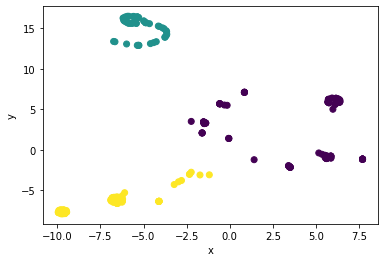

In [41]:
show_clusters(clusters)

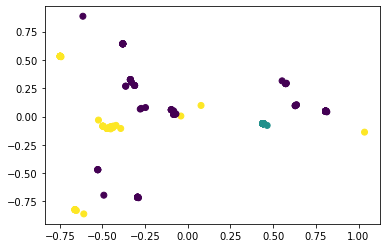

In [45]:

plt.scatter(df_crypto_pca['principal component 3'], df_crypto_pca['principal component 5'], c = labels)
plt.show()